[*********************100%%**********************]  1 of 1 completed


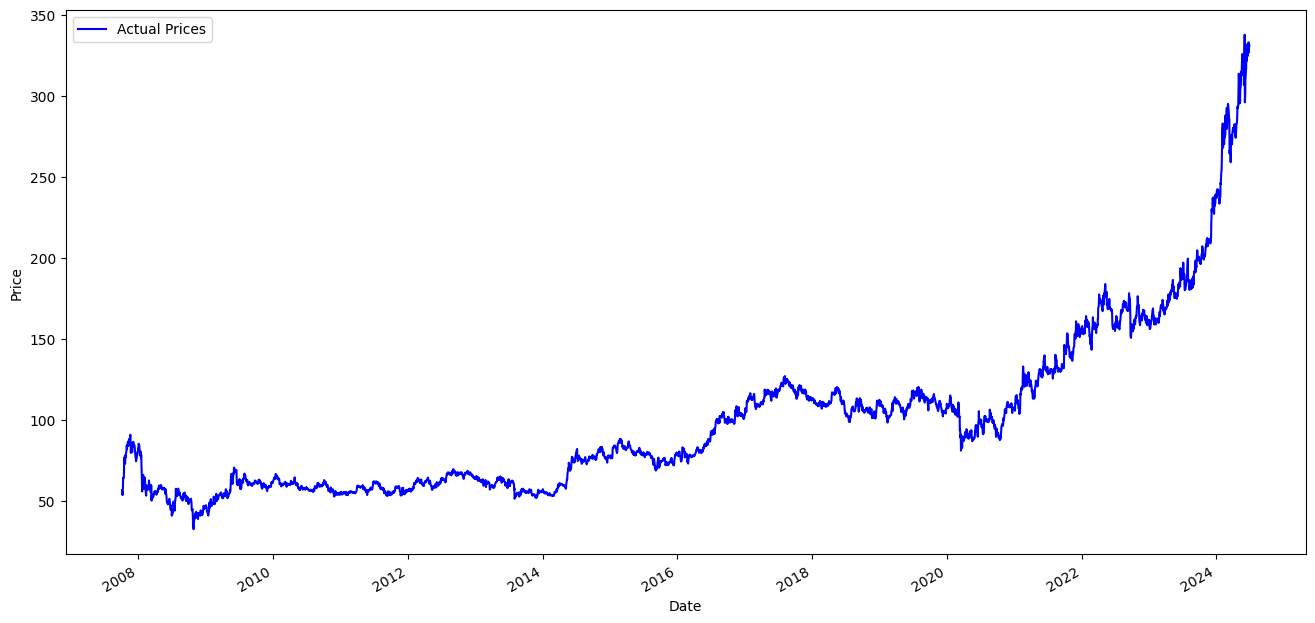

In [1]:
import yfinance as yf
import pandas as pd
from datetime import datetime


ticker = 'POWERGRID.NS'  
df = yf.download(ticker)
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))
plt.plot(df.index, df['Close'], color='blue', label='Actual Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.gcf().autofmt_xdate()  # Rotate date labels for better readability
plt.show()

In [2]:
import numpy as np
data = df.filter(['Close'])

dataset = data.values

training_data_len = int(np.ceil( len(dataset) * .95 ))

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(20, len(train_data)):
    x_train.append(train_data[i-20:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 21:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(300, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(200, return_sequences=False))
model.add(Dense(100))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=10, epochs=10)

[array([0.07855916, 0.06906199, 0.08104871, 0.08280061, 0.10400789,
       0.10262481, 0.10539098, 0.12705928, 0.145316  , 0.13646426,
       0.13563442, 0.13240723, 0.14946525, 0.14550042, 0.14494717,
       0.15250803, 0.15776376, 0.16366492, 0.16928945, 0.16311167])]
[0.16799856228959137]

[array([0.07855916, 0.06906199, 0.08104871, 0.08280061, 0.10400789,
       0.10262481, 0.10539098, 0.12705928, 0.145316  , 0.13646426,
       0.13563442, 0.13240723, 0.14946525, 0.14550042, 0.14494717,
       0.15250803, 0.15776376, 0.16366492, 0.16928945, 0.16311167]), array([0.06906199, 0.08104871, 0.08280061, 0.10400789, 0.10262481,
       0.10539098, 0.12705928, 0.145316  , 0.13646426, 0.13563442,
       0.13240723, 0.14946525, 0.14550042, 0.14494717, 0.15250803,
       0.15776376, 0.16366492, 0.16928945, 0.16311167, 0.16799856])]
[0.16799856228959137, 0.17362311652245166]




Epoch 1/10

390/390 [==============================] - 49s 106ms/step - loss: 5.0276e-04
Epoch 2/10
390/390 [=========

In [5]:
predictions = model.predict(x_train)
# predictions = scaler.inverse_transform(predictions)
r2 = r2_score(y_train,predictions)
r2

122/122 [==============================] - 4s 34ms/step


0.9952612557359377

In [6]:
from  sklearn.metrics import r2_score
test_data = scaled_data[training_data_len - 20: , :]

x_test = []
y_test = scaled_data[training_data_len:, :]
for i in range(20, len(test_data)):
    x_test.append(test_data[i-20:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
# predictions = scaler.inverse_transform(predictions)
r2 = r2_score(y_test,predictions)
r2

7/7 [==============================] - 0s 39ms/step


0.9814438103484704

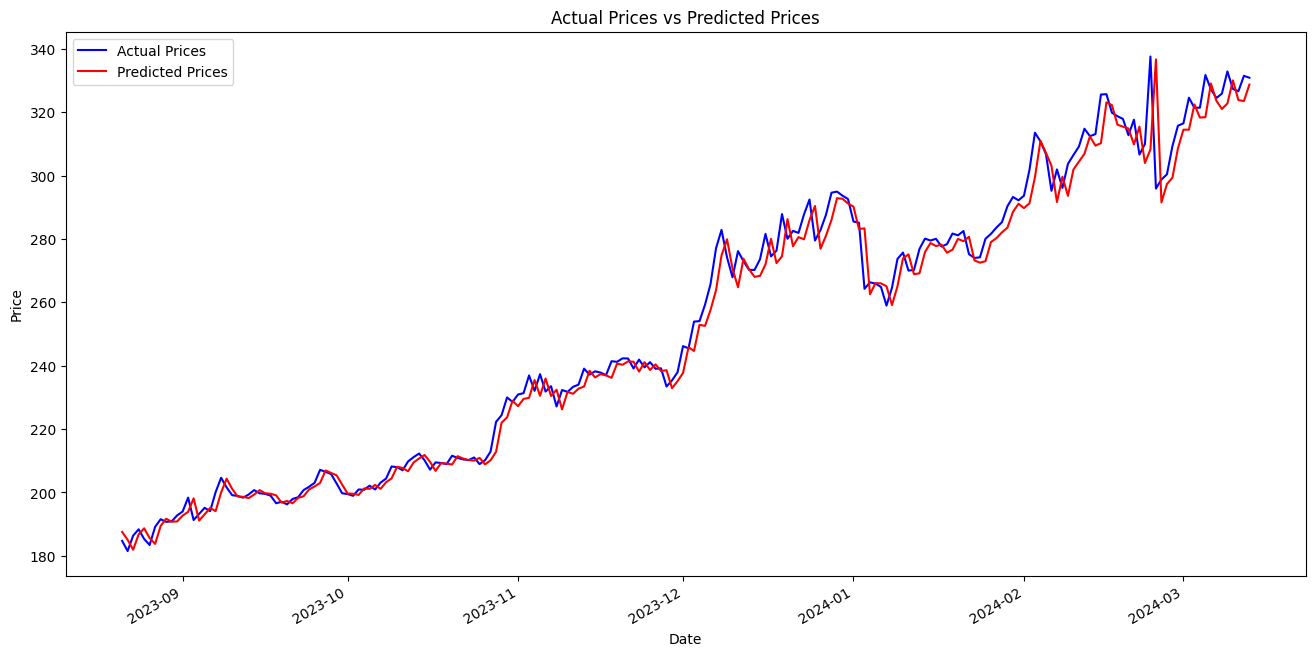

In [7]:
import matplotlib.pyplot as plt
y_test = scaler.inverse_transform(y_test)
predictions = scaler.inverse_transform(predictions)
test_dates = pd.date_range(start='2023-08-21', periods=len(y_test), freq='D')

# Plot the data
plt.figure(figsize=(16, 8))
plt.plot(test_dates, y_test, color='blue', label='Actual Prices')
plt.plot(test_dates, predictions, color='red', label='Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.gcf().autofmt_xdate()  # Rotate date labels for better readability
plt.show()

In [8]:
import joblib


model_file_path = '20.joblib'
scaler_file_path = 'scaler20.joblib'

joblib.dump(model, model_file_path)
joblib.dump(scaler, scaler_file_path)

print(f"Model saved to {model_file_path}")
print(f"Scaler saved to {scaler_file_path}")

Model saved to 20.joblib
Scaler saved to scaler20.joblib
